# Gaussian-Bernoulli RBM: Derivations

## 2.1 Derivations (15 pts)

### Objective
Derive the mathematical expressions for $p(v_i = x \mid h)$ and $p(h_j = 1 \mid v)$ given the energy function of a Gaussian-Bernoulli Restricted Boltzmann Machine (GB-RBM):

$$
E(v, h; \theta) = -\left( \sum_i \sum_j W_{ij} \frac{v_i}{\sigma_i} h_j 
+ \sum_i \frac{(v_i - b_i)^2}{2\sigma_i^2} - \sum_j \alpha_j h_j \right)
$$

### Derivation of $p(h_j = 1 \mid v)$

The conditional probability $p(h_j = 1 \mid v)$ is computed using the joint probability of $v$ and $h$:

$$
p(v, h) = \frac{1}{Z} \exp(-E(v, h))
$$

The conditional probability $p(h_j \mid v)$ is defined as:

$$
p(h_j \mid v) = \frac{p(v, h_j)}{\sum_{h_j} p(v, h_j)} = \frac{\exp(-E(v, h_j))}{\sum_{h_j} \exp(-E(v, h_j))}
$$

Since $h_j \in \{0, 1\}$, we calculate $p(h_j = 1 \mid v)$ and $p(h_j = 0 \mid v)$.

#### Step 1: Compute Energy for $h_j$:
- For $h_j = 1$:
$$
E(v, h_j = 1) = -\left( \sum_i W_{ij} \frac{v_i}{\sigma_i} + \alpha_j \right) + \text{constant}
$$

- For $h_j = 0$:
$$
E(v, h_j = 0) = -\text{constant}
$$

#### Step 2: Compute Energy Difference:

$$
\Delta E = \sum_i W_{ij} \frac{v_i}{\sigma_i} + \alpha_j
$$

#### Step 3: Compute Conditional Probability:

$$
p(h_j = 1 \mid v) = \sigma\left( \sum_i W_{ij} \frac{v_i}{\sigma_i} + \alpha_j \right)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$ is the sigmoid function.

### Derivation of $p(v_i = x \mid h)$

The conditional probability $p(v_i \mid h)$ for Gaussian visible units is:
$$
p(v_i \mid h) = \frac{p(v_i, h)}{p(h)} = \frac{\exp(-E(v_i, h))}{\int \exp(-E(v_i, h)) dv_i}
$$

#### Step 1: Extract Terms Involving $v_i$:
$$
E(v_i, h) = -\left( \sum_j W_{ij} \frac{v_i}{\sigma_i} h_j + \frac{(v_i - b_i)^2}{2\sigma_i^2} \right) + \text{constant}
$$

#### Step 2: Let $\tilde{W}_i = \sum_j W_{ij} h_j$, then:
$$
-\left( \frac{v_i}{\sigma_i} \tilde{W}_i + \frac{(v_i - b_i)^2}{2\sigma_i^2} \right)
$$

### Step 3: Expand the Quadratic Term:
First, expand $(v_i - b_i)^2$:
$$
-\left( \frac{v_i}{\sigma_i} \tilde{W}_i + \frac{v_i^2 - 2b_iv_i + b_i^2}{2\sigma_i^2} \right)
$$

Combine like terms:
$$
-\left( \frac{v_i^2}{2\sigma_i^2} - \frac{b_iv_i}{\sigma_i^2} + \frac{b_i^2}{2\sigma_i^2} + \frac{v_i\tilde{W}_i}{\sigma_i} \right)
$$

#### Step 4: Complete the Square:

Collect terms with $v_i$:
$$
-\left( \frac{1}{2\sigma_i^2}v_i^2 + \left(-\frac{b_i}{\sigma_i^2} + \frac{\tilde{W}_i}{\sigma_i}\right)v_i + \frac{b_i^2}{2\sigma_i^2} \right)
$$

Let:
- $A = \frac{1}{2\sigma_i^2}$
- $B = -\frac{b_i}{\sigma_i^2} + \frac{\tilde{W}_i}{\sigma_i}$
- $C = \frac{b_i^2}{2\sigma_i^2}$

Then:
$$
-(Av_i^2 + Bv_i + C)
$$

Complete the square by adding and subtracting $\frac{B^2}{4A}$:
$$
-A\left(v_i^2 + \frac{B}{A}v_i + \frac{B^2}{4A^2}\right) + \frac{B^2}{4A} - C
$$
$$
-A\left(v_i + \frac{B}{2A}\right)^2 + \frac{B^2}{4A} - C
$$

#### Step 5: Substitute Back Original Terms:
$$
-\frac{1}{2\sigma_i^2}\left(v_i - \left(b_i + \sigma_i\tilde{W}_i\right)\right)^2 + \text{constant}
$$

This reveals a Gaussian distribution with:
- Mean: $\mu_i = b_i + \sigma_i\tilde{W}_i = b_i + \sigma_i \sum_j W_{ij} h_j$
- Variance: $\sigma_i^2$


### Final Results

1. Conditional probability of hidden units:
$$
p(h_j = 1 \mid v) = \sigma\left( \sum_i W_{ij} \frac{v_i}{\sigma_i} + \alpha_j \right)
$$

2. Conditional probability of visible units:
$$
p(v_i \mid h) = \mathcal{N}\left(v_i \mid b_i + \sigma_i \sum_j W_{ij} h_j, \sigma_i^2 \right)
$$

Using Device: mps
Global Mean: 0.19176216423511505, Global Std: 0.3483428359031677

M = 16:
Train Epoch: 1 [50%]	Loss: -45.0727
Train Epoch: 1 [100%]	Loss: -63.0781
Test Epoch: 1 	Loss: -95.1550 	MSE: 610.6159


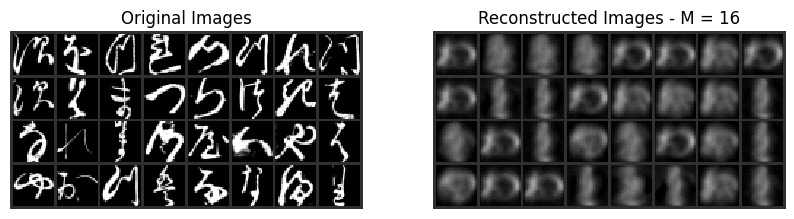

Train Epoch: 2 [50%]	Loss: -97.2321
Train Epoch: 2 [100%]	Loss: -103.6670
Test Epoch: 2 	Loss: -116.9743 	MSE: 569.9721


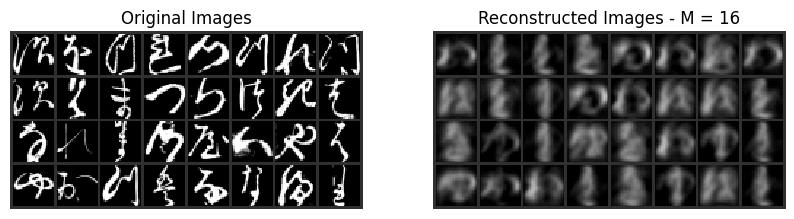

Train Epoch: 3 [50%]	Loss: -119.3120
Train Epoch: 3 [100%]	Loss: -123.2317
Test Epoch: 3 	Loss: -129.2480 	MSE: 541.4397


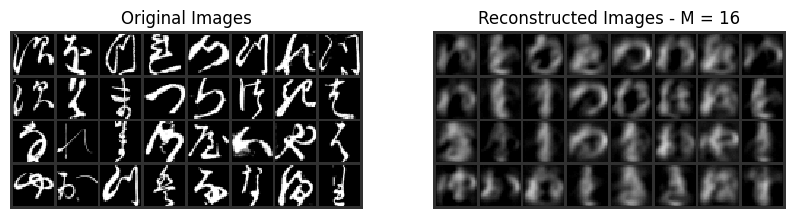

Train Epoch: 4 [50%]	Loss: -131.6890
Train Epoch: 4 [100%]	Loss: -133.4888
Test Epoch: 4 	Loss: -136.0260 	MSE: 524.9852


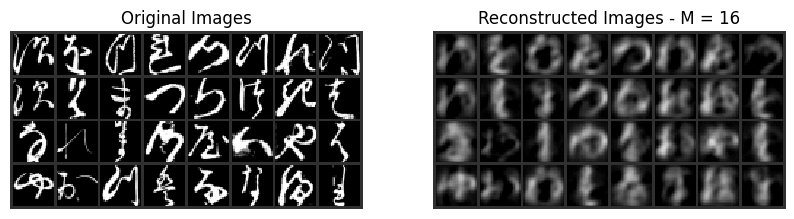

Train Epoch: 5 [50%]	Loss: -138.7203
Train Epoch: 5 [100%]	Loss: -139.5423
Test Epoch: 5 	Loss: -140.2392 	MSE: 514.0662


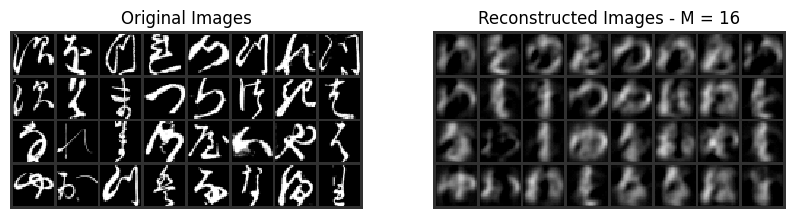

Train Epoch: 6 [50%]	Loss: -142.2031
Train Epoch: 6 [100%]	Loss: -143.0900
Test Epoch: 6 	Loss: -142.1630 	MSE: 507.4158


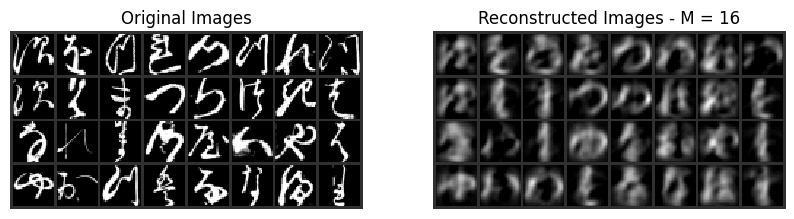

Train Epoch: 7 [50%]	Loss: -144.4310
Train Epoch: 7 [100%]	Loss: -145.2854
Test Epoch: 7 	Loss: -143.4902 	MSE: 503.6708


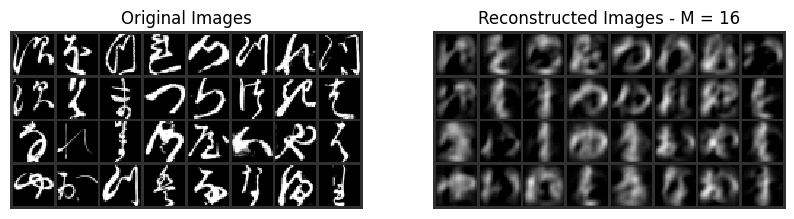

Train Epoch: 8 [50%]	Loss: -146.1082
Train Epoch: 8 [100%]	Loss: -146.8061
Test Epoch: 8 	Loss: -144.5663 	MSE: 500.8896


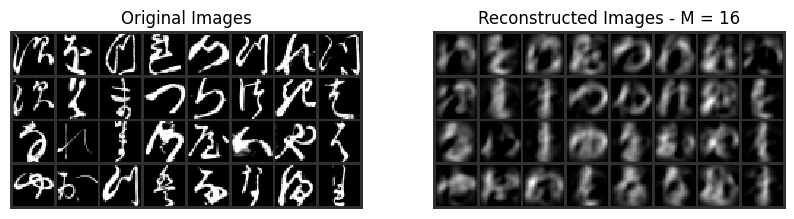

Train Epoch: 9 [50%]	Loss: -147.5264
Train Epoch: 9 [100%]	Loss: -148.2236
Test Epoch: 9 	Loss: -145.2203 	MSE: 498.7548


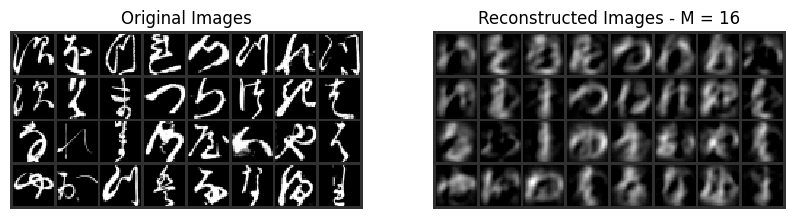

Train Epoch: 10 [50%]	Loss: -148.8261
Train Epoch: 10 [100%]	Loss: -149.0188
Test Epoch: 10 	Loss: -146.2211 	MSE: 497.1277


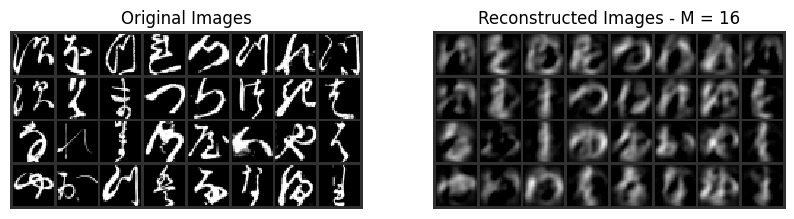

Train Epoch: 11 [50%]	Loss: -149.1404
Train Epoch: 11 [100%]	Loss: -149.7551
Test Epoch: 11 	Loss: -146.3904 	MSE: 495.9981


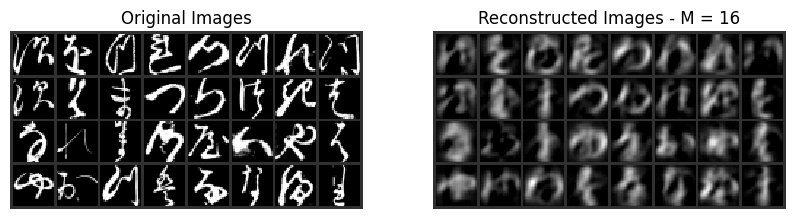

Train Epoch: 12 [50%]	Loss: -149.8179
Train Epoch: 12 [100%]	Loss: -150.1270
Test Epoch: 12 	Loss: -146.9381 	MSE: 495.3300


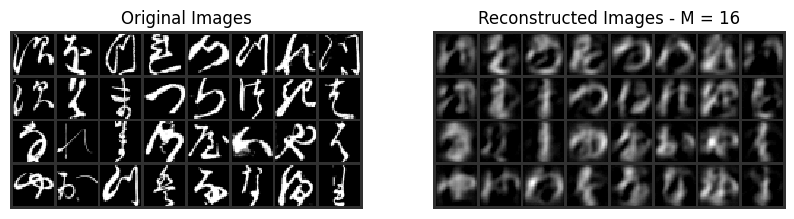

Train Epoch: 13 [50%]	Loss: -150.8972
Train Epoch: 13 [100%]	Loss: -150.8213
Test Epoch: 13 	Loss: -147.4978 	MSE: 494.2423


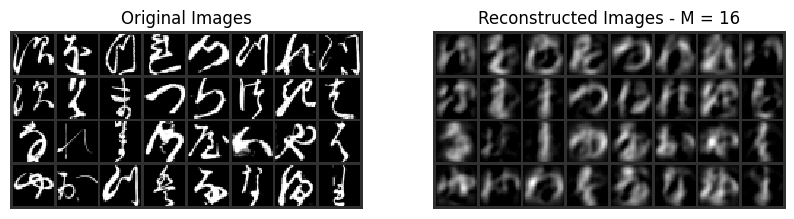

Train Epoch: 14 [50%]	Loss: -150.7258
Train Epoch: 14 [100%]	Loss: -151.1929
Test Epoch: 14 	Loss: -147.3249 	MSE: 493.8378


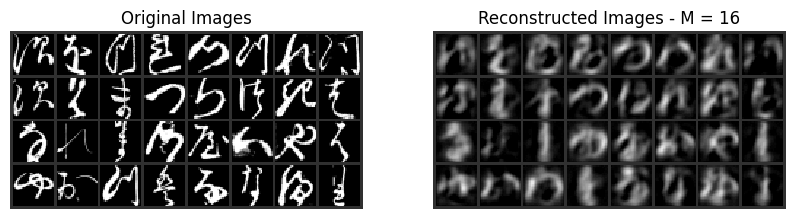

Train Epoch: 15 [50%]	Loss: -151.9316
Train Epoch: 15 [100%]	Loss: -151.4412
Test Epoch: 15 	Loss: -148.1710 	MSE: 492.8146


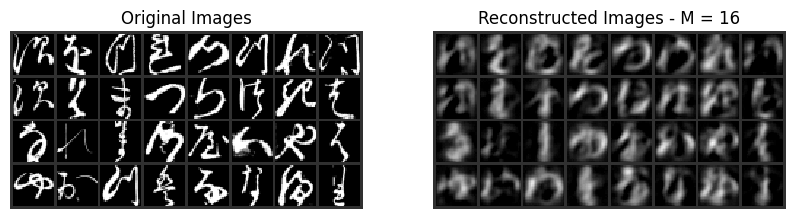

Train Epoch: 16 [50%]	Loss: -151.9189
Train Epoch: 16 [100%]	Loss: -151.7496
Test Epoch: 16 	Loss: -148.2069 	MSE: 492.3977


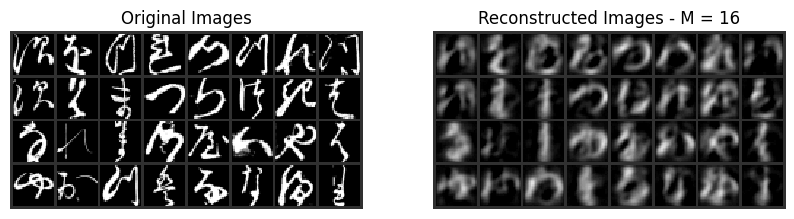

Train Epoch: 17 [50%]	Loss: -152.1793
Train Epoch: 17 [100%]	Loss: -152.0006
Test Epoch: 17 	Loss: -148.4193 	MSE: 491.7360


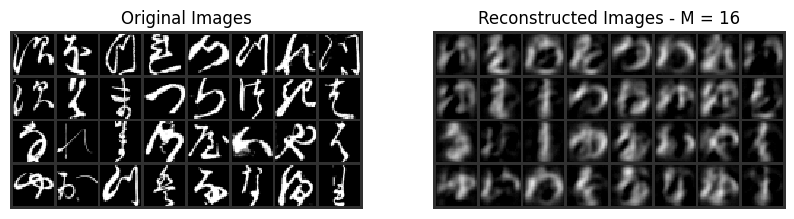

Train Epoch: 18 [50%]	Loss: -152.4350
Train Epoch: 18 [100%]	Loss: -152.1899
Test Epoch: 18 	Loss: -148.5662 	MSE: 491.8546


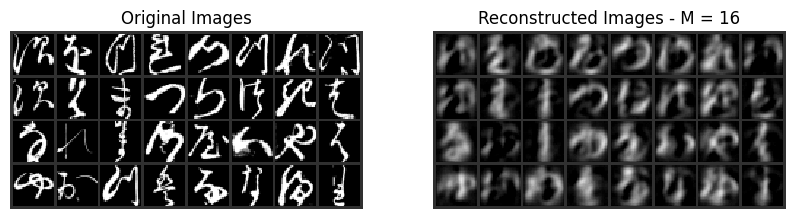

Train Epoch: 19 [50%]	Loss: -152.1387
Train Epoch: 19 [100%]	Loss: -152.4636
Test Epoch: 19 	Loss: -148.9419 	MSE: 491.0694


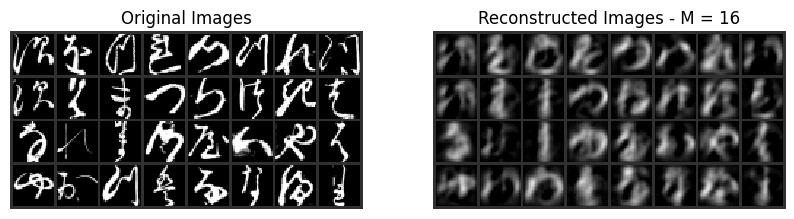

Train Epoch: 20 [50%]	Loss: -152.7347
Train Epoch: 20 [100%]	Loss: -152.7165
Test Epoch: 20 	Loss: -148.7373 	MSE: 490.1272


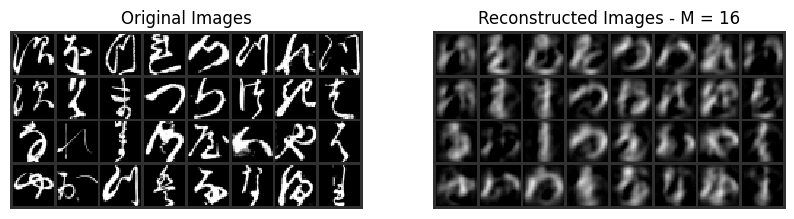

Train Epoch: 21 [50%]	Loss: -152.7502
Train Epoch: 21 [100%]	Loss: -152.8052
Test Epoch: 21 	Loss: -149.2895 	MSE: 490.0234


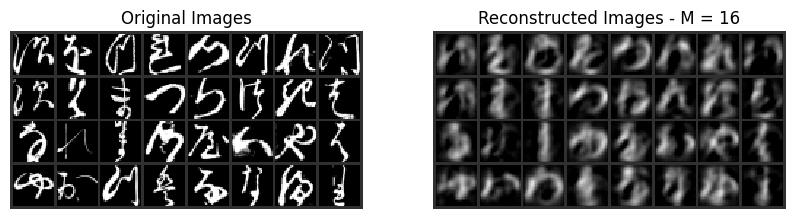

Train Epoch: 22 [50%]	Loss: -152.8201
Train Epoch: 22 [100%]	Loss: -152.8675
Test Epoch: 22 	Loss: -149.3128 	MSE: 489.1090


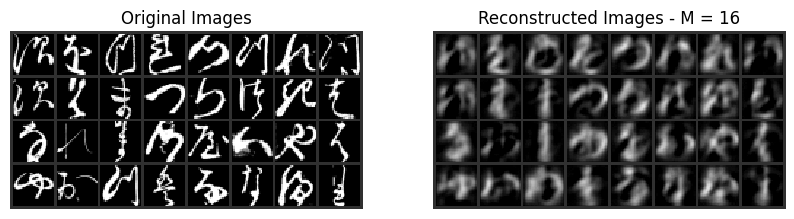

Train Epoch: 23 [50%]	Loss: -152.8861
Train Epoch: 23 [100%]	Loss: -153.1809
Test Epoch: 23 	Loss: -149.3203 	MSE: 489.5539


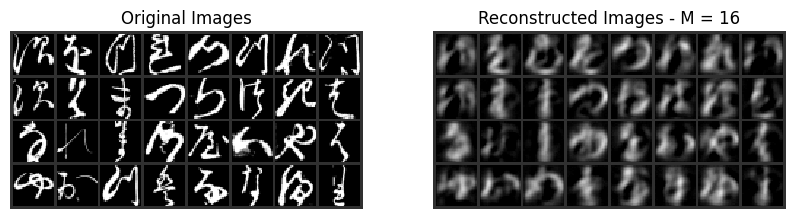

Train Epoch: 24 [50%]	Loss: -153.3646
Train Epoch: 24 [100%]	Loss: -153.3737
Test Epoch: 24 	Loss: -149.8447 	MSE: 488.7828


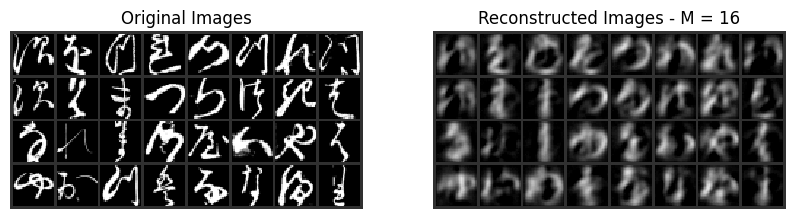

Train Epoch: 25 [50%]	Loss: -153.3492
Train Epoch: 25 [100%]	Loss: -153.4152
Test Epoch: 25 	Loss: -150.2126 	MSE: 488.1531


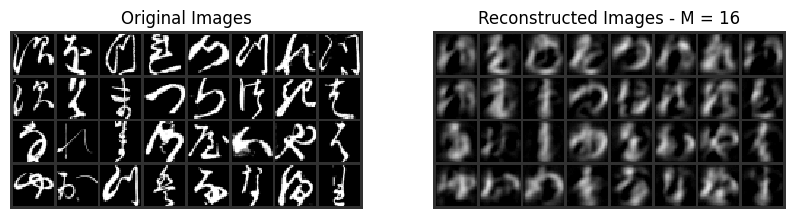


M = 64:
Train Epoch: 1 [50%]	Loss: -83.7316
Train Epoch: 1 [100%]	Loss: -111.6631
Test Epoch: 1 	Loss: -149.8473 	MSE: 536.3302


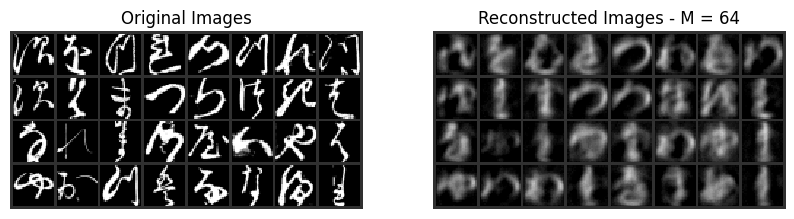

Train Epoch: 2 [50%]	Loss: -161.4337
Train Epoch: 2 [100%]	Loss: -167.6961
Test Epoch: 2 	Loss: -174.5101 	MSE: 503.1792


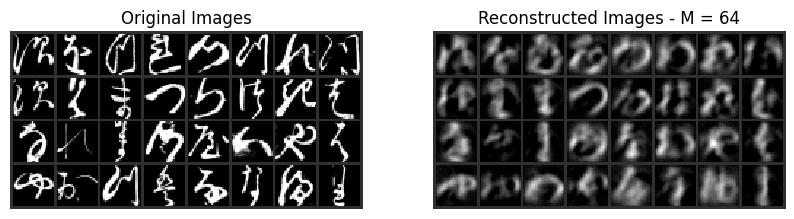

Train Epoch: 3 [50%]	Loss: -183.4407
Train Epoch: 3 [100%]	Loss: -187.1546
Test Epoch: 3 	Loss: -187.4867 	MSE: 482.4587


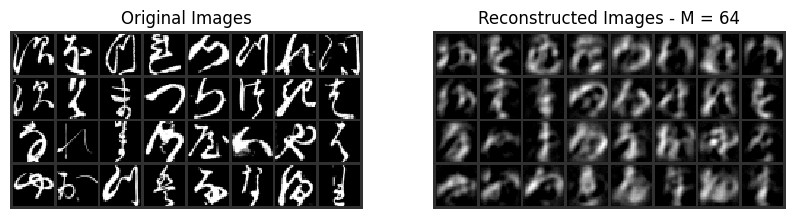

Train Epoch: 4 [50%]	Loss: -196.4441
Train Epoch: 4 [100%]	Loss: -198.6034
Test Epoch: 4 	Loss: -197.0361 	MSE: 465.0008


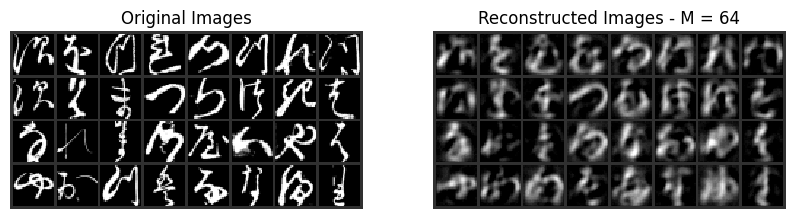

Train Epoch: 5 [50%]	Loss: -204.5757
Train Epoch: 5 [100%]	Loss: -206.0689
Test Epoch: 5 	Loss: -203.2376 	MSE: 452.4011


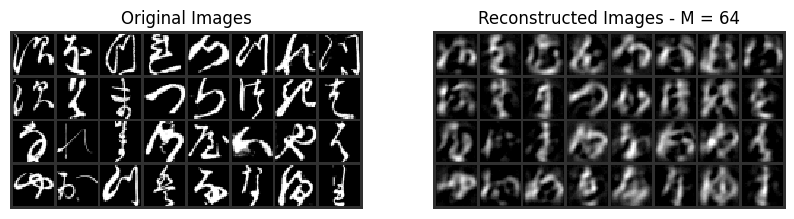

Train Epoch: 6 [50%]	Loss: -210.1029
Train Epoch: 6 [100%]	Loss: -211.4158
Test Epoch: 6 	Loss: -207.2075 	MSE: 443.1652


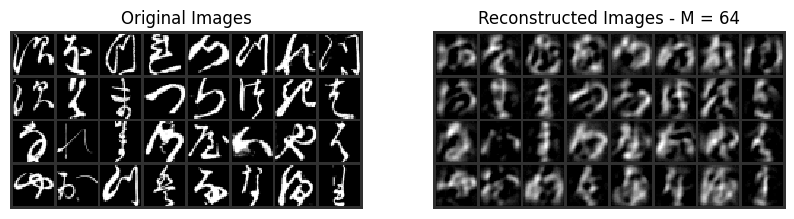

Train Epoch: 7 [50%]	Loss: -213.9663
Train Epoch: 7 [100%]	Loss: -215.2306
Test Epoch: 7 	Loss: -210.5193 	MSE: 434.5888


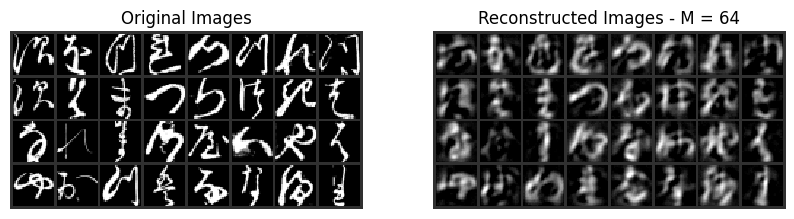

Train Epoch: 8 [50%]	Loss: -217.4251
Train Epoch: 8 [100%]	Loss: -218.1263
Test Epoch: 8 	Loss: -212.8973 	MSE: 426.8079


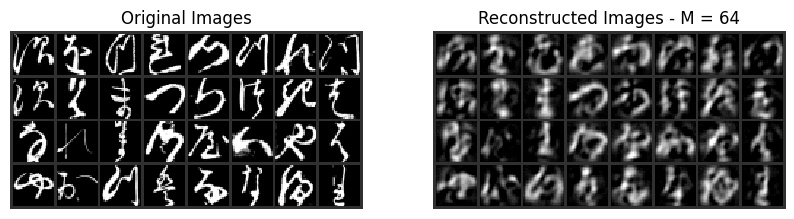

Train Epoch: 9 [50%]	Loss: -220.6473
Train Epoch: 9 [100%]	Loss: -220.7920
Test Epoch: 9 	Loss: -215.5047 	MSE: 421.7816


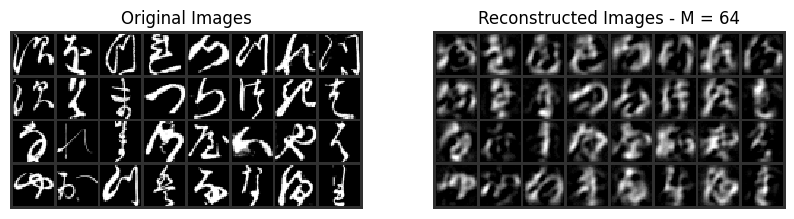

Train Epoch: 10 [50%]	Loss: -222.1520
Train Epoch: 10 [100%]	Loss: -222.6609
Test Epoch: 10 	Loss: -217.1009 	MSE: 418.0973


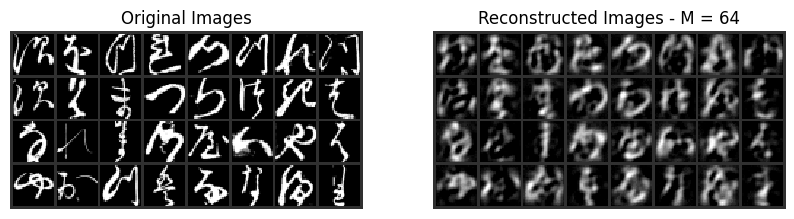

Train Epoch: 11 [50%]	Loss: -223.9264
Train Epoch: 11 [100%]	Loss: -224.2614
Test Epoch: 11 	Loss: -218.9500 	MSE: 413.2747


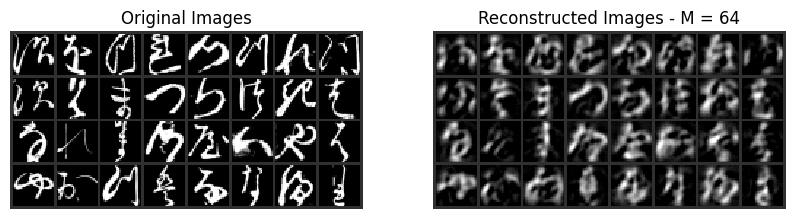

Train Epoch: 12 [50%]	Loss: -225.1905
Train Epoch: 12 [100%]	Loss: -225.5040
Test Epoch: 12 	Loss: -220.2858 	MSE: 411.1531


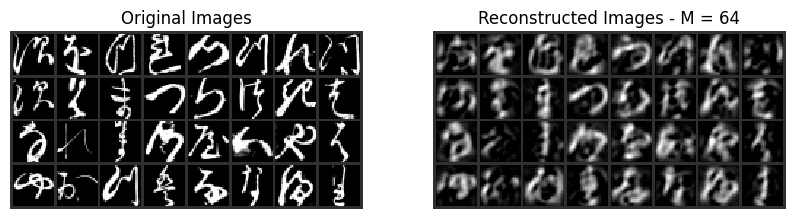

Train Epoch: 13 [50%]	Loss: -226.4666
Train Epoch: 13 [100%]	Loss: -226.5886
Test Epoch: 13 	Loss: -220.9245 	MSE: 408.2527


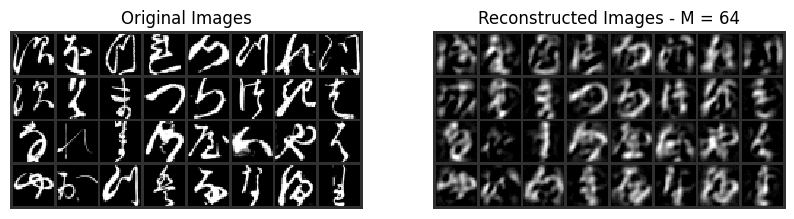

Train Epoch: 14 [50%]	Loss: -227.6895
Train Epoch: 14 [100%]	Loss: -227.7941
Test Epoch: 14 	Loss: -221.5222 	MSE: 405.4439


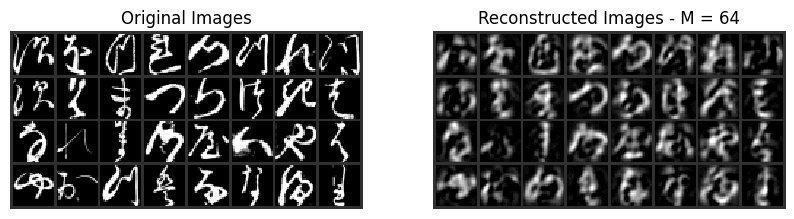

Train Epoch: 15 [50%]	Loss: -228.6203
Train Epoch: 15 [100%]	Loss: -228.7889
Test Epoch: 15 	Loss: -222.4303 	MSE: 403.8260


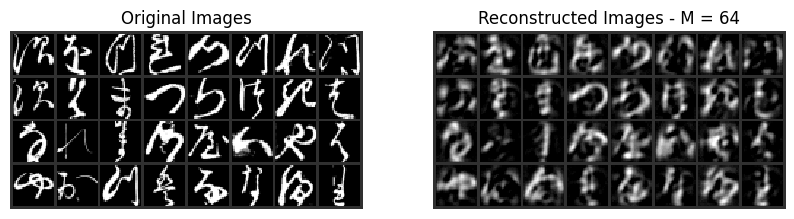

Train Epoch: 16 [50%]	Loss: -229.5757
Train Epoch: 16 [100%]	Loss: -229.6411
Test Epoch: 16 	Loss: -223.6650 	MSE: 401.2383


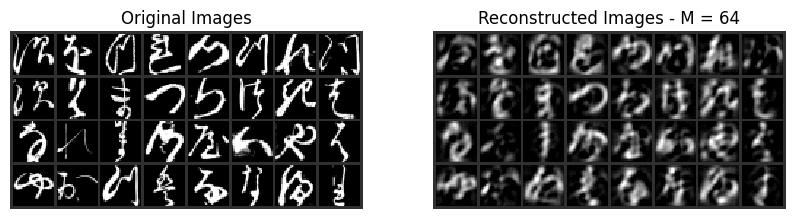

Train Epoch: 17 [50%]	Loss: -230.2593
Train Epoch: 17 [100%]	Loss: -230.3505
Test Epoch: 17 	Loss: -223.9595 	MSE: 399.3217


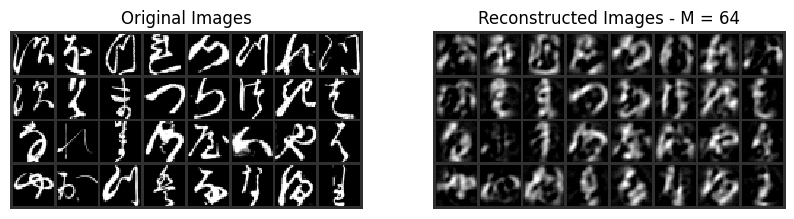

Train Epoch: 18 [50%]	Loss: -231.1552
Train Epoch: 18 [100%]	Loss: -231.1082
Test Epoch: 18 	Loss: -225.7600 	MSE: 397.3262


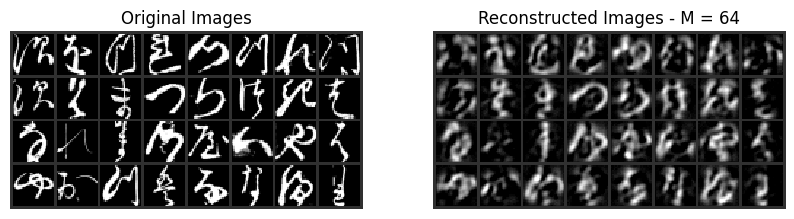

Train Epoch: 19 [50%]	Loss: -232.1796
Train Epoch: 19 [100%]	Loss: -231.7186
Test Epoch: 19 	Loss: -226.1034 	MSE: 395.2499


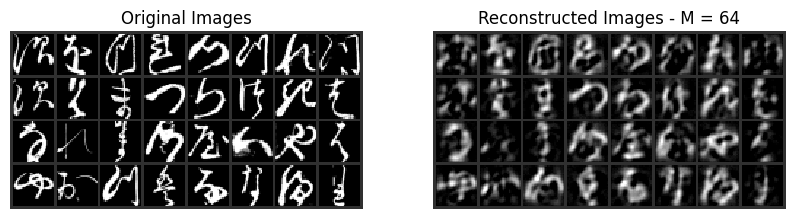

Train Epoch: 20 [50%]	Loss: -232.3644
Train Epoch: 20 [100%]	Loss: -232.4240
Test Epoch: 20 	Loss: -226.9228 	MSE: 395.2185


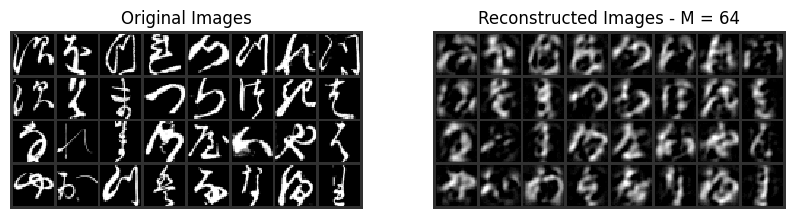

Train Epoch: 21 [50%]	Loss: -233.0618
Train Epoch: 21 [100%]	Loss: -233.1360
Test Epoch: 21 	Loss: -226.9243 	MSE: 392.4605


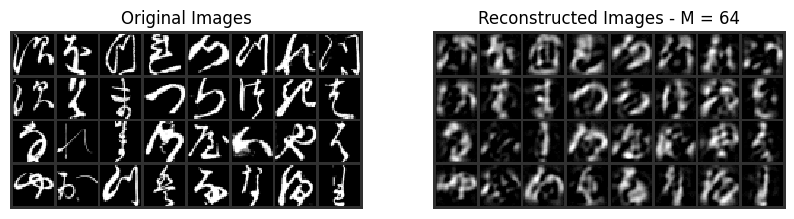

Train Epoch: 22 [50%]	Loss: -233.7693
Train Epoch: 22 [100%]	Loss: -233.7098
Test Epoch: 22 	Loss: -227.6838 	MSE: 390.9611


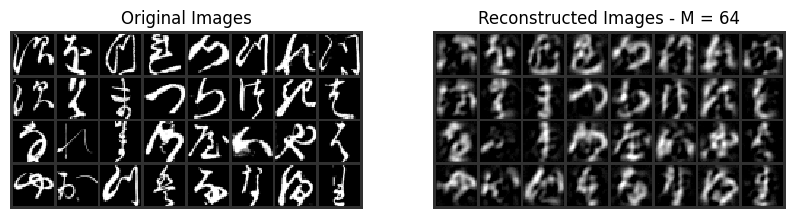

Train Epoch: 23 [50%]	Loss: -233.9392
Train Epoch: 23 [100%]	Loss: -234.2496
Test Epoch: 23 	Loss: -228.3849 	MSE: 390.4089


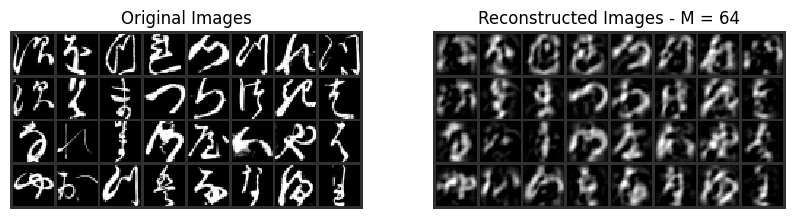

Train Epoch: 24 [50%]	Loss: -234.4321
Train Epoch: 24 [100%]	Loss: -234.6690
Test Epoch: 24 	Loss: -228.9132 	MSE: 388.2104


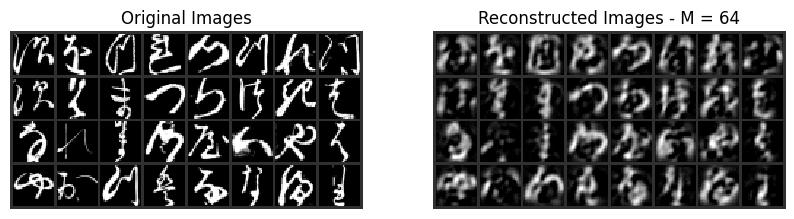

Train Epoch: 25 [50%]	Loss: -235.1702
Train Epoch: 25 [100%]	Loss: -235.2680
Test Epoch: 25 	Loss: -229.2807 	MSE: 387.7718


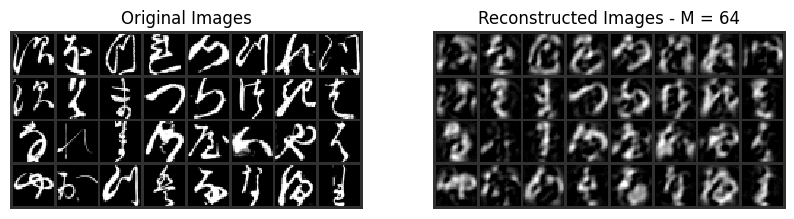


M = 256:
Train Epoch: 1 [50%]	Loss: -129.7353
Train Epoch: 1 [100%]	Loss: -166.8706
Test Epoch: 1 	Loss: -211.9591 	MSE: 504.5929


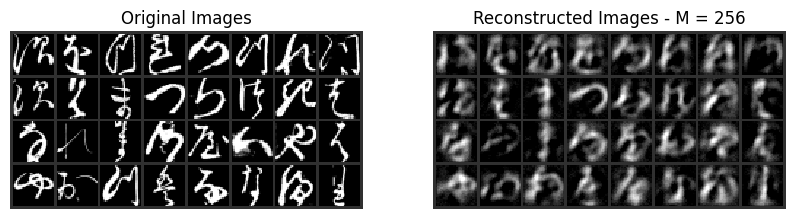

Train Epoch: 2 [50%]	Loss: -229.0133
Train Epoch: 2 [100%]	Loss: -235.2817
Test Epoch: 2 	Loss: -239.2206 	MSE: 490.4697


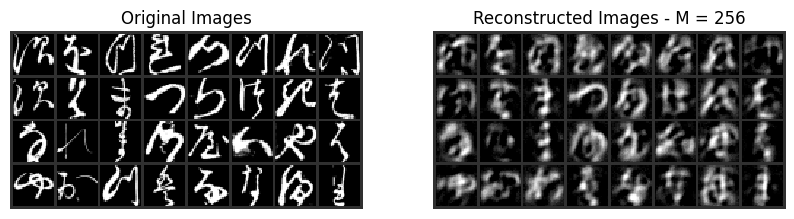

Train Epoch: 3 [50%]	Loss: -250.1088
Train Epoch: 3 [100%]	Loss: -252.9650
Test Epoch: 3 	Loss: -251.1554 	MSE: 485.7293


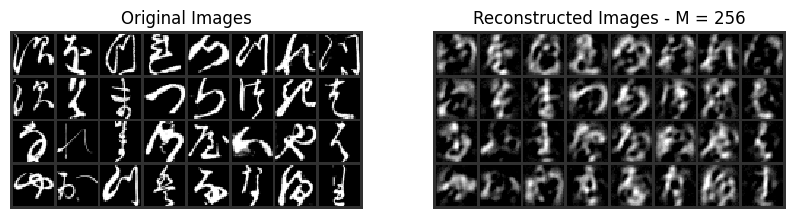

Train Epoch: 4 [50%]	Loss: -260.2087
Train Epoch: 4 [100%]	Loss: -261.7277
Test Epoch: 4 	Loss: -257.2377 	MSE: 481.7588


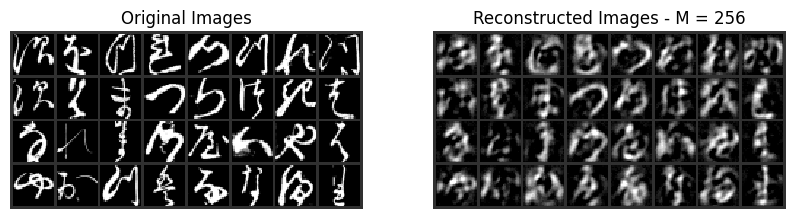

Train Epoch: 5 [50%]	Loss: -265.7262
Train Epoch: 5 [100%]	Loss: -267.2534
Test Epoch: 5 	Loss: -262.7131 	MSE: 474.8341


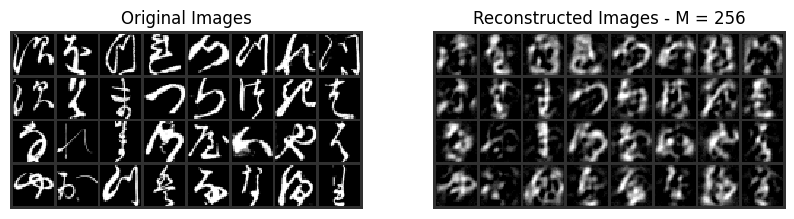

Train Epoch: 6 [50%]	Loss: -270.5014
Train Epoch: 6 [100%]	Loss: -271.6567
Test Epoch: 6 	Loss: -266.1854 	MSE: 471.4625


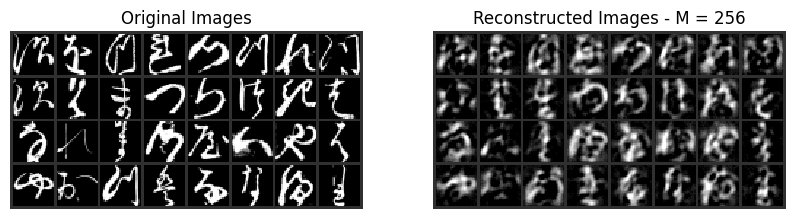

Train Epoch: 7 [50%]	Loss: -274.3456
Train Epoch: 7 [100%]	Loss: -275.3630
Test Epoch: 7 	Loss: -269.2439 	MSE: 466.7555


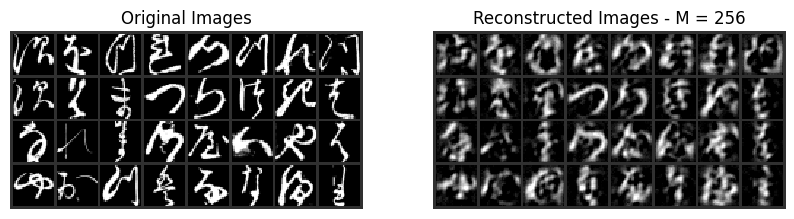

Train Epoch: 8 [50%]	Loss: -277.7697
Train Epoch: 8 [100%]	Loss: -278.5202
Test Epoch: 8 	Loss: -272.2197 	MSE: 461.0524


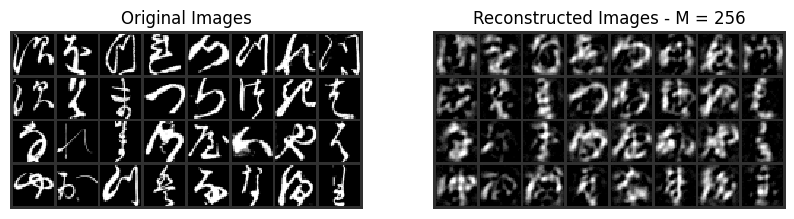

Train Epoch: 9 [50%]	Loss: -280.7621
Train Epoch: 9 [100%]	Loss: -281.2105
Test Epoch: 9 	Loss: -275.4907 	MSE: 456.0475


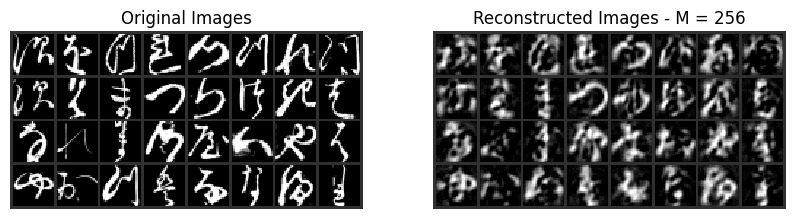

Train Epoch: 10 [50%]	Loss: -283.1876
Train Epoch: 10 [100%]	Loss: -283.7185
Test Epoch: 10 	Loss: -277.7178 	MSE: 451.4312


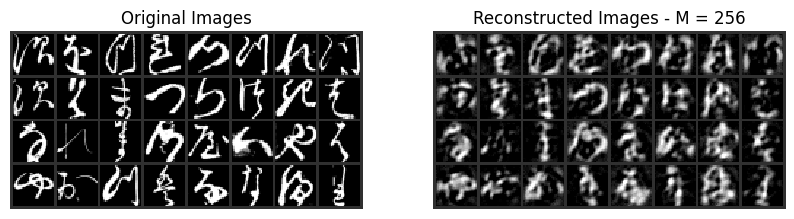

Train Epoch: 11 [50%]	Loss: -285.1443
Train Epoch: 11 [100%]	Loss: -286.0424
Test Epoch: 11 	Loss: -279.7974 	MSE: 443.6716


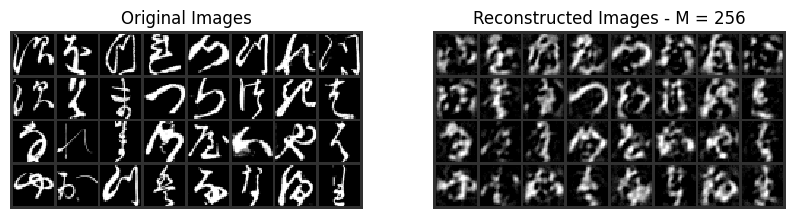

Train Epoch: 12 [50%]	Loss: -287.9749
Train Epoch: 12 [100%]	Loss: -288.3051
Test Epoch: 12 	Loss: -281.7829 	MSE: 438.1020


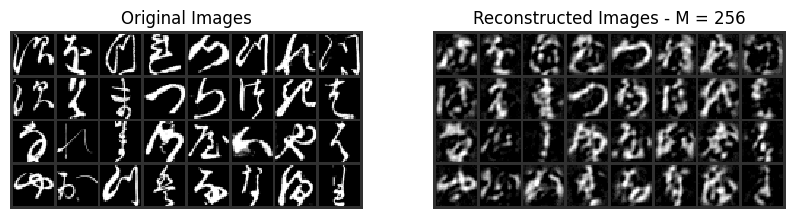

Train Epoch: 13 [50%]	Loss: -290.0675
Train Epoch: 13 [100%]	Loss: -290.3689
Test Epoch: 13 	Loss: -284.0069 	MSE: 434.5847


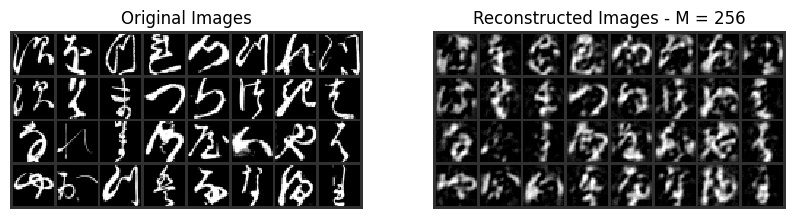

Train Epoch: 14 [50%]	Loss: -291.4934
Train Epoch: 14 [100%]	Loss: -292.2392
Test Epoch: 14 	Loss: -285.6100 	MSE: 429.2483


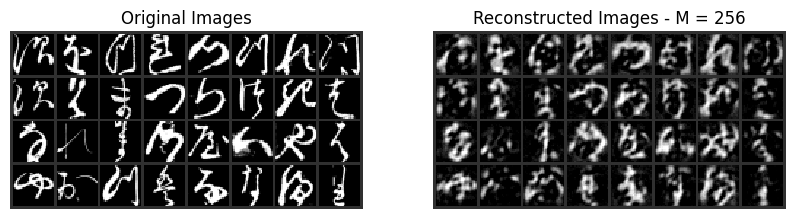

Train Epoch: 15 [50%]	Loss: -293.7647
Train Epoch: 15 [100%]	Loss: -294.1565
Test Epoch: 15 	Loss: -287.1934 	MSE: 424.6053


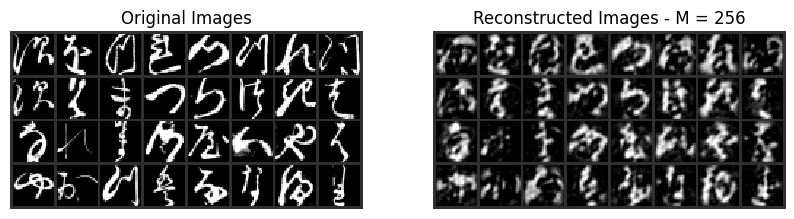

Train Epoch: 16 [50%]	Loss: -295.4323
Train Epoch: 16 [100%]	Loss: -295.7888
Test Epoch: 16 	Loss: -289.1504 	MSE: 420.5302


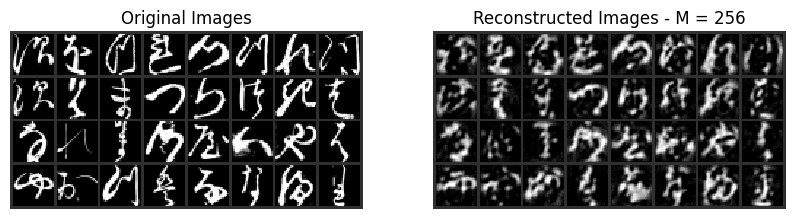

Train Epoch: 17 [50%]	Loss: -297.0660
Train Epoch: 17 [100%]	Loss: -297.4546
Test Epoch: 17 	Loss: -290.9642 	MSE: 415.0023


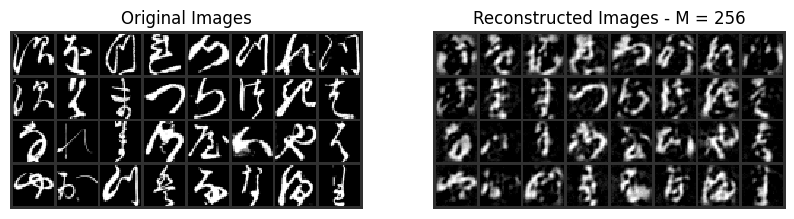

Train Epoch: 18 [50%]	Loss: -298.2056
Train Epoch: 18 [100%]	Loss: -298.6303
Test Epoch: 18 	Loss: -292.4809 	MSE: 412.0913


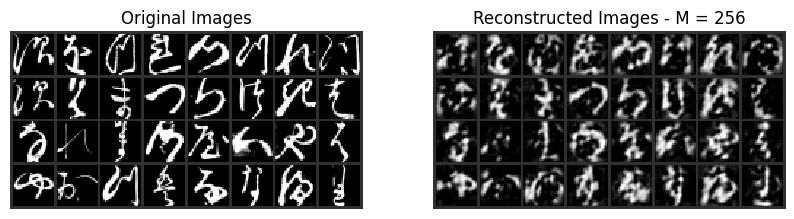

Train Epoch: 19 [50%]	Loss: -299.6884
Train Epoch: 19 [100%]	Loss: -300.0313
Test Epoch: 19 	Loss: -293.3864 	MSE: 409.5864


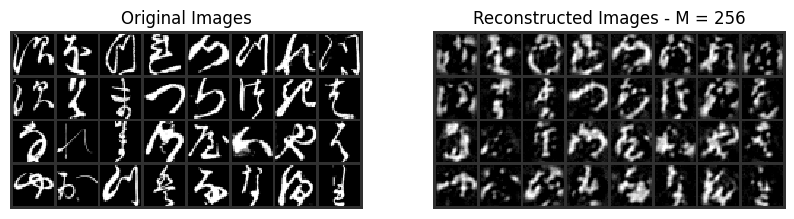

Train Epoch: 20 [50%]	Loss: -301.4281
Train Epoch: 20 [100%]	Loss: -301.4862
Test Epoch: 20 	Loss: -294.8161 	MSE: 404.7623


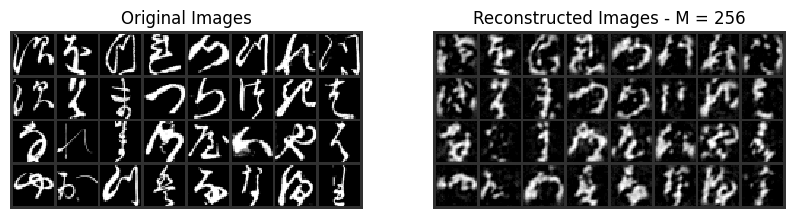

Train Epoch: 21 [50%]	Loss: -301.9312
Train Epoch: 21 [100%]	Loss: -302.2223
Test Epoch: 21 	Loss: -295.7810 	MSE: 404.0463


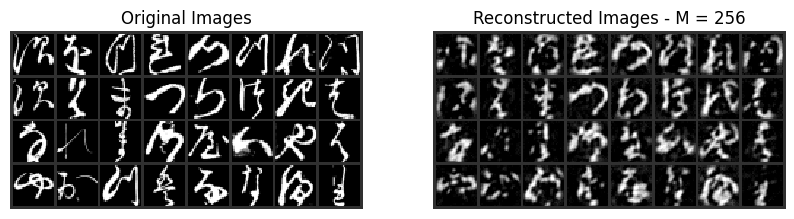

Train Epoch: 22 [50%]	Loss: -303.3391
Train Epoch: 22 [100%]	Loss: -303.6008
Test Epoch: 22 	Loss: -296.9986 	MSE: 400.8189


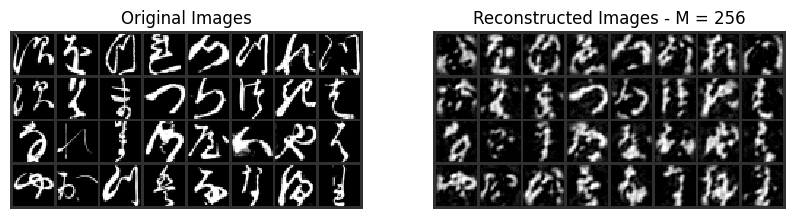

Train Epoch: 23 [50%]	Loss: -304.4571
Train Epoch: 23 [100%]	Loss: -304.6106
Test Epoch: 23 	Loss: -298.1841 	MSE: 397.1320


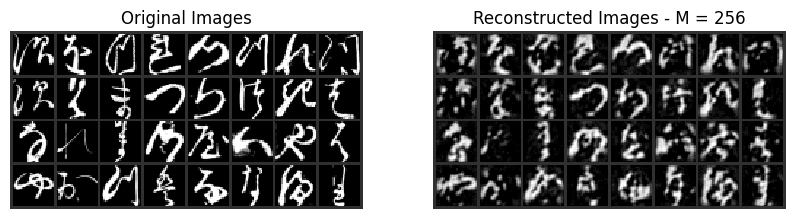

Train Epoch: 24 [50%]	Loss: -305.4978
Train Epoch: 24 [100%]	Loss: -305.4542
Test Epoch: 24 	Loss: -299.1026 	MSE: 395.5896


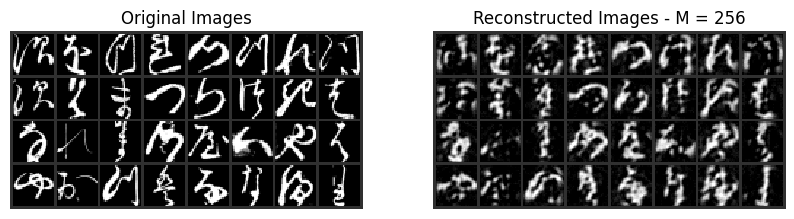

Train Epoch: 25 [50%]	Loss: -306.5977
Train Epoch: 25 [100%]	Loss: -306.5200
Test Epoch: 25 	Loss: -300.1305 	MSE: 393.1252


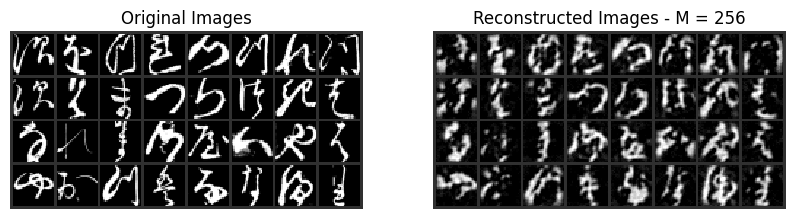

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
import numpy as np

# Set device
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f'Using Device: {device}')
batch_size = 128

# Let's normalize - slides say to do so

# Initial transform to compute mean and std
initial_transform = transforms.Compose([transforms.ToTensor()])

# Load training data to compute global mean and std
train_set_for_norm = torchvision.datasets.KMNIST(root='./data', train=True, download=True, transform=initial_transform)
train_loader_for_norm = torch.utils.data.DataLoader(train_set_for_norm, batch_size=len(train_set_for_norm))
train_data_full, _ = next(iter(train_loader_for_norm))
global_mean = train_data_full.mean().item()
global_std = train_data_full.std().item()
print(f"Global Mean: {global_mean}, Global Std: {global_std}")

# Updated transform with global normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((global_mean,), (global_std,))
])

# Load datasets with normalized transform
train_set = torchvision.datasets.KMNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.KMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)

# Defining Gaussian-Bernoulli RBM
class RBM(nn.Module):
    """Restricted Boltzmann Machine implementation."""
    
    def __init__(self, D: int, F: int, k: int):
        """Initializes the RBM parameters.
        
        Args:
            D: Dimension of the visible layer.
            F: Dimension of the hidden layer.
            k: Number of Gibbs sampling steps.
        """
        super().__init__()
        self.W = nn.Parameter(torch.randn(F, D) * 0.01)  # Weight matrix initialized with small values
        self.c = nn.Parameter(torch.zeros(D))  # Visible biases
        self.b = nn.Parameter(torch.zeros(F))  # Hidden biases
        self.k = k
        self.sigma = 1.0  # Standard deviation for Gaussian distribution 
        
    def sample(self, p):
        """Samples from a Bernoulli distribution."""
        return torch.bernoulli(p)
    
    def sample_gaussian(self, mu):
        """Samples from a Gaussian distribution with mean mu and standard deviation sigma."""
        return mu + torch.randn_like(mu) * self.sigma
    
    def P_h_x(self, x):
        """Probability of hidden units given visible units."""
        return torch.sigmoid(F.linear(x, self.W, self.b))
    
    def P_x_h(self, h):
        """Mean of visible units given hidden units."""
        mu_x_given_h = F.linear(h, self.W.t(), self.c)
        return mu_x_given_h
        
    def free_energy(self, x):
        """Computes the free energy F(x)."""
        v_term = torch.sum((x - self.c) ** 2, dim=1) / (2 * self.sigma ** 2) # Gaussian visible units
        wx_b = F.linear(x, self.W, self.b)
        hidden_term = torch.sum(F.softplus(wx_b), dim=1) # ends up being the same as softplus
        return v_term - hidden_term
        
    def forward(self, x):
        """Performs k steps of Gibbs sampling starting from x."""
        with torch.no_grad(): # no gradients needed for sampling
            x_k = x.clone()
            for _ in range(self.k):
                # Gibbs sampling
                p_h_given_x = self.P_h_x(x_k)
                h_k = self.sample(p_h_given_x)
                mu_x_given_h = self.P_x_h(h_k)
                x_k = self.sample_gaussian(mu_x_given_h)
            return x_k, mu_x_given_h

def train(model, device, train_loader, optimizer, epoch):
    train_loss = 0
    model.train()
    for batch_idx, (data, _) in enumerate(train_loader):
        # Preprocess data
        data = data.view(data.size(0), -1).to(device)
        # Data is already normalized globally
        optimizer.zero_grad()
        
        # CD-k sampling
        x_negative, _ = model(data)
        
        # Compute loss: free_energy(data) - free_energy(x_negative)
        loss = torch.mean(model.free_energy(data) - model.free_energy(x_negative))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
        if (batch_idx + 1) % (len(train_loader) // 2) == 0:
            print('Train Epoch: {} [{:.0f}%]\tLoss: {:.4f}'.format(
                epoch, 100. * (batch_idx + 1) / len(train_loader), train_loss / (batch_idx + 1)))

def test(model, device, test_loader, epoch):
    model.eval()
    test_loss = 0
    test_mse = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.view(data.size(0), -1).to(device)
            # Data is already normalized globally
            x_negative, mu_x_given_h = model(data)
            
            # Compute loss
            loss = torch.mean(model.free_energy(data) - model.free_energy(x_negative))
            test_loss += loss.item() * data.size(0)
            
            # Compute MSE using means for reconstruction
            mse = F.mse_loss(data, mu_x_given_h, reduction='sum').item()
            test_mse += mse
        
    test_loss /= len(test_loader.dataset)
    test_mse /= len(test_loader.dataset)
    print('Test Epoch: {} \tLoss: {:.4f} \tMSE: {:.4f}'.format(epoch, test_loss, test_mse))

def show(img1, img2, title1='Original', title2='Reconstructed'):
    """Displays original and reconstructed images side by side."""
    # Unnormalize images for visualization
    img1 = img1 * global_std + global_mean
    img2 = img2 * global_std + global_mean
    
    img1 = torch.clamp(img1, 0, 1)
    img2 = torch.clamp(img2, 0, 1)
    
    npimg1 = img1.cpu().numpy()
    npimg2 = img2.cpu().numpy()
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(np.transpose(npimg1, (1, 2, 0)), interpolation='nearest')
    axes[0].set_title(title1)
    axes[0].axis('off')
    axes[1].imshow(np.transpose(npimg2, (1, 2, 0)), interpolation='nearest')
    axes[1].set_title(title2)
    axes[1].axis('off')
    plt.show()

# Training and Testing the RBM
seed = 42
num_epochs = 25
torch.manual_seed(seed)
if device == 'cuda':
    torch.cuda.manual_seed(seed)
M = [16, 64, 256]

for m in M:
    print(f"\nM = {m}:")
    rbm = RBM(D=28 * 28, F=m, k=5).to(device)
    optimizer = optim.Adam(rbm.parameters(), lr=1e-3, weight_decay=0)
    for epoch in range(1, num_epochs + 1):
        train(rbm, device, train_loader, optimizer, epoch)
        test(rbm, device, test_loader, epoch)
        
        # Reconstructing samples for plotting
        rbm.eval()
        with torch.no_grad():
            data, _ = next(iter(test_loader))
            data = data[:32]
            data_size = data.size()
            data = data.view(data.size(0), -1).to(device)
            x_negative, mu_x_given_h = rbm(data)
            # Use mu_x_given_h for reconstruction
            reconstructed = mu_x_given_h.view(data_size).cpu()
            original = data.view(data_size).cpu()
        
        # Plotting original and reconstructed images
        grid_original = make_grid(original, nrow=8, padding=2)
        grid_reconstructed = make_grid(reconstructed, nrow=8, padding=2)
        show(grid_original, grid_reconstructed, title1='Original Images', title2=f'Reconstructed Images - M = {m}')
